In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv('mushroom_ft_engineer.csv', index_col = 0)
df2 = pd.read_csv('le_mushroom_ft_engineer.csv', index_col = 0)

# Decision Tree

In [3]:
y = df2['class']
X = df2.drop(['class', 'spore-print-color', 'veil-type'] , axis = 1)

# Split X and y with even class distributions
# stratify to create randomness in your data but one that also has the same propoertoins across train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

#### Scale

In [6]:
#Scale the data
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

#### Fit

In [7]:
dtree = DecisionTreeClassifier(max_depth = 10)
print(dtree.fit(X_train, y_train))
dtree.score(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


1.0

#### Cross Validate

In [8]:
#Now with cross validation search
val = cross_val_score(DecisionTreeClassifier(random_state=42),X_train,y_train,cv=5)
val.mean()

1.0

## DTree_Grid Search

In [22]:
dtree_param_grid = {
    "class_weight": ['balanced'],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6, 10],
    "max_features": [None,4,5,6,9,10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 3, 5, 6],
    "random_state": [27,42,70]
}


dtree_grid = DecisionTreeClassifier()
gridsearch = GridSearchCV(dtree_grid, dtree_param_grid, cv=3, return_train_score=True, n_jobs=-1, verbose=-1)

gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 2071 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4400 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6272 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                        

In [23]:
print("Testing Accuracy: {:.4}%".format(gridsearch.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(gridsearch.best_params_))

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Model: {}".format(gridsearch.best_estimator_))

Testing Accuracy: 100.0%

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 27}
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=27, splitter='best')


In [24]:
gridsearch.score(X_test, y_test)

1.0

In [7]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
#import seaborn as sns

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

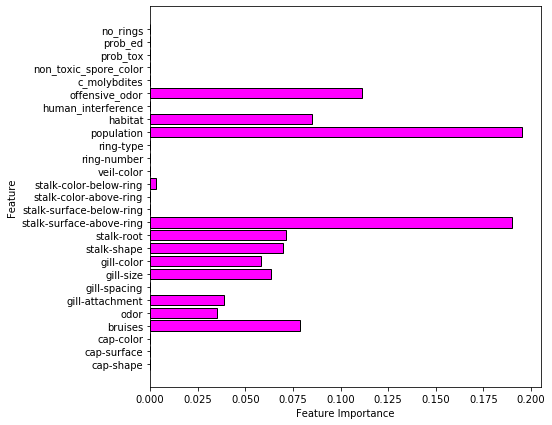

In [20]:
d = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=27, splitter='best')
d.fit(X_train,y_train)

n_features = X_train.shape[1]
plt.figure(figsize=(7,7))
plt.barh(range(n_features), d.feature_importances_, align='center', color = 'magenta', ec = 'black') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.save_fig('dtree_ft_importance.png')